<a href="https://colab.research.google.com/github/dellaar/Della_Portofolio/blob/main/Analisis_Pilkada_DKI_Jakarta_Tahun_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Akhir Analisis Media Sosial Kelompok 2**



# Install dan import Module



In [ ]:
import warnings; warnings.simplefilter('ignore')
!pip install Sastrawi
!pip install textblob
!pip install wget
!pip install tqdm
!pip install unidecode
import pandas as pd
import random
import re
import nltk
import torch
import requests
import json
import Sastrawi
import urllib.request
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from tqdm import tqdm
from html import unescape
from sklearn import svm
from sklearn.svm import SVC
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from textblob import TextBlob
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
nltk.download('punkt')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=aaff150429ffeeb39d4f266703f0e5ff5df242f0464eeba675ac1dd94a089228
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 7.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
random.seed(7)

In [ ]:
# Loading Data
try:
    data1 = pd.read_csv('data/data-sentimen/dataset_komentar_instagram_cyberbullying.csv')
    data2 = pd.read_csv('data/data-sentimen/dataset_tweet_sentimen_tayangan_tv.csv')
    data3 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_cellular_service_provider.csv')
    data4 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_opini_film.csv')
    data5 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
    print("Loaded from local file.")
except:
    data1 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_komentar_instagram_cyberbullying.csv')
    data2 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentimen_tayangan_tv.csv')
    data3 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_cellular_service_provider.csv')
    data4 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_opini_film.csv')
    data5 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
    print("Loaded from Github.")

Loaded from Github.


In [ ]:
data1 = data1.drop(columns=['Id']).rename(columns={'Instagram Comment Text':'Content'})
data2 = data2.drop(columns=['Id','Acara TV','Jumlah Retweet']).rename(columns={'Text Tweet':'Content'})
data3 = data3.drop(columns=['Id']).rename(columns={'Text Tweet':'Content'})
data4 = data4.drop(columns=['Id']).rename(columns={'Text Tweet':'Content'})
data5 = data5.drop(columns=['Id','Pasangan Calon']).rename(columns={'Text Tweet':'Content'})

df = pd.concat([data1,data2,data3,data4,data5], ignore_index=True)
df.head()

,Sentiment,Content
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [ ]:
df["Content"]

0        <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1       Geblek lo tata...cowo bgt dibela2in balikan......
2       Kmrn termewek2 skr lengket lg duhhh kok labil ...
3       Intinya kalau kesel dengan ATT nya, gausah ke ...
4       hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...
                              ...                        
2195    Kali saja bpk @aniesbaswedan @sandiuno lihat, ...
2196    Kita harus dapat merangkul semua orang tanpa b...
2197    Ini jagoanku dibidang digital <Smiling Face Wi...
2198                 #PesanBijak #OkeOce #GubernurGu3 ...
2199    Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...
Name: Content, Length: 2200, dtype: object

In [ ]:
hashtags = []
for tweet in df['Content']:
    hashtag_list = re.findall(r'#\w+', tweet)
    hashtags.extend(hashtag_list)

# Banyaknya hashtag per setiap hashtag
hashtag_counts = pd.Series(hashtags).value_counts()
hashtag_counts

#AHY                        160
#AhokDjarot                 153
#AniesSandi                 122
#pilkadadki2017              99
#kickandy                    50
                           ... 
#RakernasDemokrat2017         1
#partaidemokrat               1
#lombok                       1
#gilitrawangan                1
#AniesSandiJawaraJakarta      1
Length: 769, dtype: int64

In [ ]:
len(hashtags)

2219

In [ ]:
top_15_hashtags = hashtag_counts.head(15)
print(top_15_hashtags)

#AHY               160
#AhokDjarot        153
#AniesSandi        122
#pilkadadki2017     99
#kickandy           50
#PilkadaDKI         46
#ahokdjarot         45
#PilkadaDKI2017     39
#Ahok               36
#ILC                32
#OkeOce             30
#aniessandi         26
#ahok               26
#Boikot             24
#ahy                21
dtype: int64


# Mengecek dan menangani Duplikasi

In [ ]:
df[df.duplicated()==True]

,Sentiment,Content
57,negative,"<USERNAME> ini lagi pemikiran manusia bodoh, ..."
71,negative,<USERNAME> bisa nya cuma ngatain org . Nyindi...
94,negative,Dasar artis abal abal enggk laku di layar kaca...
971,positive,Terimakasih ya <PROVIDER_NAME> gratis 4Gnya ay...
1053,negative,Jaringan internet <PROVIDER_NAME> di sumba tim...
1255,positive,"pokoknya kalian harus nonton film kartini, asl..."
1280,positive,nah ini. coba nonton filmnya deh. asik parah
1426,negative,ahoker masih bully #AHY
2038,negative,"Setelah KO di beberapa Polling, kini mereka go..."


In [ ]:
# cek duplikasi
print(df.duplicated().sum())

# membuang duplikasi
df.drop_duplicates(inplace=True)
print(df.shape)

9
(2191, 2)


# Preprocessing


In [ ]:
# import slang
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/slang.dic'
response = urllib.request.urlopen(url)
slang_id = eval(response.read())

print("jumlah slang: ", len(slang_id))

jumlah slang:  1629


In [ ]:
# jika ada slang yang belum tertangani
slang_tambahan = {
    'gak': 'tidak',
    'abis': 'habis',
    'jgn': 'jangan',
    'geblek': 'goblok',
}
slang_id.update(slang_tambahan)

print("jumlah slang : ", len(slang_id))

jumlah slang :  1630


In [ ]:
# import stopword
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/stopwords_id.txt'
response = urllib.request.urlopen(url)
stopword_id = response.read().decode('utf-8').split('\n')

print("jumlah stopword: ", len(stopword_id))

jumlah stopword:  758


In [ ]:
# bisa ditambahkan jika ada stopword yang belum tertangani
stopword_tambahan = set(['a',
                         'b', 'biar',
                         'c',
                         'd',
                         'e',
                         'f', 'film', 'face',
                         'g', 'google',
                         'h',
                         'i',
                         'j',
                         'k',
                         'l',
                         'm', 'mata', 'metro', 'mas', 'mbak',
                         'n', 'name', 'nya', 'nonton', 'najwa',
                         'o',
                         'p', 'provider', 'product',
                         'q',
                         'r',
                         's', 'sih', 'si',
                         't', 'TP', 'tv', 'tonton',
                         'u', 'username', 'url',
                         'v',
                         'w',
                         'x',
                         'y',
                         'z',])
stopword_id = set(stopword_id).union(stopword_tambahan)

print("jumlah stopword: ", len(stopword_id))

jumlah stopword:  804


In [ ]:
# data cleaning
def cleaning_text(text):
  # menghapus url
  url_pattern = re.compile(r'(\w+:\/\/\S+)')
  text = url_pattern.sub(' ', text)
  # menghapus hashtag
  hashtag_pattern = re.compile(r'#\w+\b')
  text = hashtag_pattern.sub(' ', text)
  # menghapus nama pengguna instagram (memuat "@")
  username_pattern = re.compile(r'@\w+\b\s*')
  text = username_pattern.sub(' ', text)
  # menghapus angka
  text = re.sub(r'\b\d+\b|[^\w\s]', '', text)
  # mengahpus simbol
  symbol_pattern = re.compile(r'[^\w\s]+')
  text = symbol_pattern.sub(' ', text)
  # menghapus karakter yang tidak diperlukan (tergantung media sosial)
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'\r', ' ', text)
  text = re.sub(r'&\w+', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  # menangani huruf kapital dan spasi
  text = unidecode(unescape(text.lower().strip()))
  return text

def remove_stopword(text):
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w in stopword_id]
  return ' '.join(filtered_sentence)

def stemming_and_lemmatization(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  return stemmer.stem(text)

def remove_slang(text):
  text = ''.join(slang_id[p] if p in slang_id else p for p in re.split(r'(\W+)', text))
  return text

def preprocess(text):
  # cleaning text and lowercase
  output = cleaning_text(text)
  # remove slang
  output = remove_slang(output)
  # stemming and lemmatization
  output = stemming_and_lemmatization(output)
  # remove stopwords
  output = remove_stopword(output)

  return output
"done"

'done'

In [ ]:
df['clean_text'] = ''
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_text'] = preprocess(post.Content)

2191it [16:58,  2.15it/s]


In [ ]:
print(df['clean_text'])

0       tolol hubung gugur pakai hijab syar bilang bay...
1       goblok tatacowo banget dibela2in balikanhadeww...
2       kemarin termewek2 skr lengket duhhh labil bang...
3       inti kesel att gausah kah anak kasi kembang ps...
4       hadewwwww permpuan lgsakit jiwaknp peran utama...
                              ...                        
2195                      kali lihat rspun selfie ok hand
2196    rangkul orang batas usia kelamin ok hand menan...
2197    jago bidang digital smiling with sunglasses ok...
2198                                                     
2199    sandiaga bangun rumah dp simpel banding tol ci...
Name: clean_text, Length: 2191, dtype: object


#Model Random Forest

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Membagi data training dan data testing (30% data testing dan 70% data training)
x = df['clean_text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

print(x_train.shape, x_test.shape)

(1533,) (658,)


In [ ]:
# Cross Validasi
# Menentukan optimal parameter Random Forest dengan RandomSEARCH

pipeRF = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
print(sorted(pipeRF.get_params().keys()))

['memory', 'randomforestclassifier', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start', 'steps', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvector

In [ ]:
# Optimal parameter RF dengan RandomizedSearch

seed = 99
kCV = 5
metric = 'accuracy'
paramsRF = {}
paramsRF['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsRF['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsRF['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsRF['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsRF['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsRF['randomforestclassifier__n_estimators'] = [100, 200, 300]
paramsRF['randomforestclassifier__max_depth'] = [None, 5, 10]
paramsRF['randomforestclassifier__min_samples_split'] = [2, 5, 10]
paramsRF['randomforestclassifier__min_samples_leaf'] = [1, 2, 4]
paramsRF['randomforestclassifier__bootstrap'] = [True, False]

pipeRF = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
randRF = RandomizedSearchCV(pipeRF, paramsRF, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=1)
randRF.fit(x_train, y_train)
print(randRF.best_score_)
print(randRF.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.7364458921462179
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__max_df': 0.5, 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__bootstrap': True}


In [ ]:
# Melakukan vektorisasi menggunakan TF-IDF
vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, ngram_range=(1, 2), max_df=0.95, min_df=5)
x_train_vectorized = vsm.fit_transform(x_train)
x_test_vect = vsm.transform(x_test)

print(x_train_vectorized.shape, x_test_vect.shape) # Jumlah kolom Sama ==> ini penting

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1533, 518) (658, 518)


In [ ]:
# Evaluasi model

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

model = RandomForestClassifier()
model.fit(x_train_vectorized, y_train)
y_pred = model.predict(x_test_vect)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.7264437689969605
Confusion Matrix:
[[221 109]
 [ 71 257]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.67      0.71       330
    positive       0.70      0.78      0.74       328

    accuracy                           0.73       658
   macro avg       0.73      0.73      0.73       658
weighted avg       0.73      0.73      0.73       658



In [ ]:
# confusion matrix untuk evaluasi kerja model; membandingkan hasil prediksi dengan nilai sebenarnya
cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[221, 109],
       [ 71, 257]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


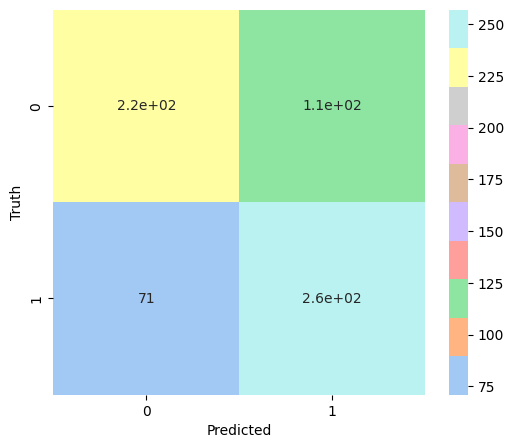

In [ ]:
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap=colors)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
# Membuat DataFrame dari hasil prediksi
df_pred = pd.DataFrame({'Text': x_test, 'Prediction': y_pred})

# Menyimpan DataFrame ke dalam file CSV
df_pred.to_csv('RandomForest_Predictions.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# WordClouds

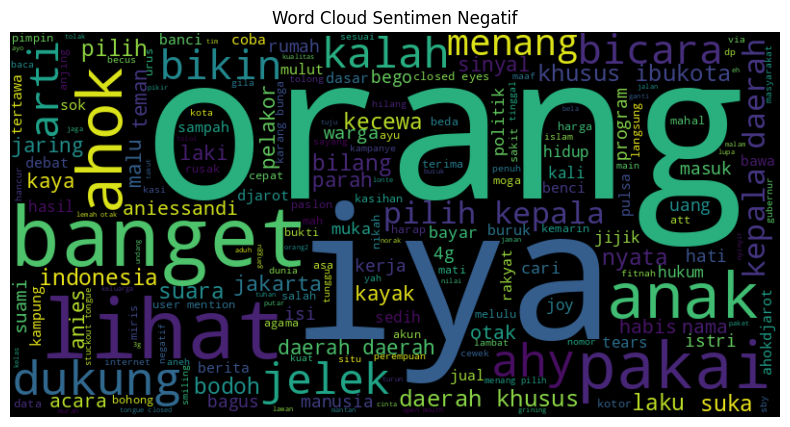

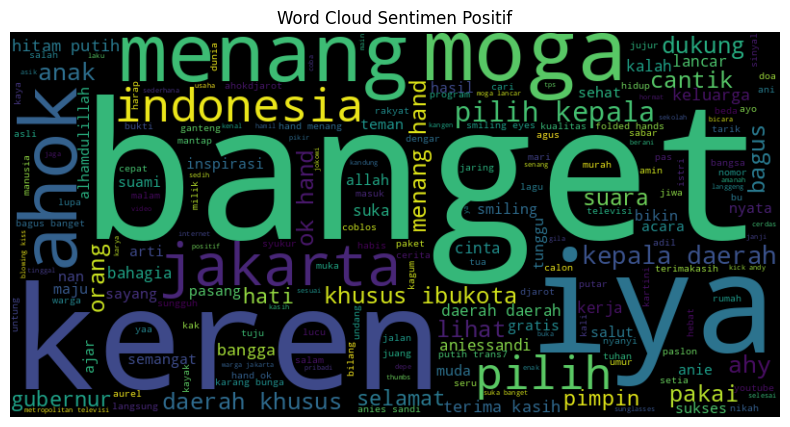

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca file CSV
df1 = pd.read_csv('https://raw.githubusercontent.com/dellaar/Analisis_sentimen/main/RandomForest_Predictions.csv')

# Membuat subset data sentimen negatif
df_negatif = df1[df1['Sentiment'] == 'negative']
# Menggabungkan semua teks dari kolom 'cleaned_text' pada sentimen negatif menjadi satu string
text_negatif = ' '.join(df_negatif['clean_text'].astype(str))

# Membuat subset data sentimen positif
df_positif = df1[df1['Sentiment'] == 'positive']
# Menggabungkan semua teks dari kolom 'cleaned_text' pada sentimen positif menjadi satu string
text_positif = ' '.join(df_positif['clean_text'].astype(str))

# Membuat WordCloud untuk sentimen negatif
wordcloud_negatif = WordCloud(width=800, height=400).generate(text_negatif)
# Menampilkan WordCloud sentimen negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('Word Cloud Sentimen Negatif')
plt.axis('off')
plt.show()

# Membuat WordCloud untuk sentimen positif
wordcloud_positif = WordCloud(width=800, height=400).generate(text_positif)
# Menampilkan WordCloud sentimen positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('Word Cloud Sentimen Positif')
plt.axis('off')
plt.show()

# N-gram Visualization

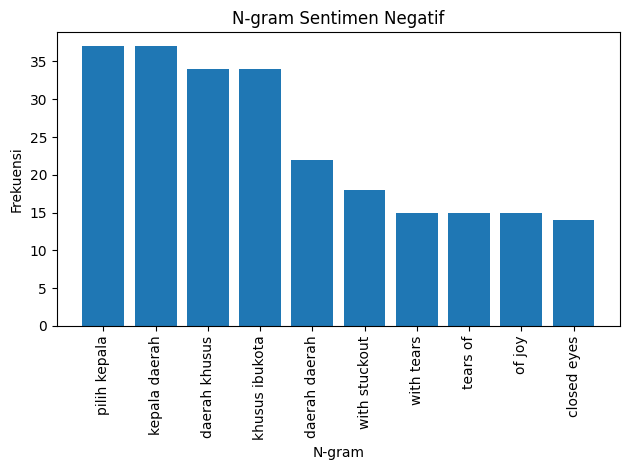

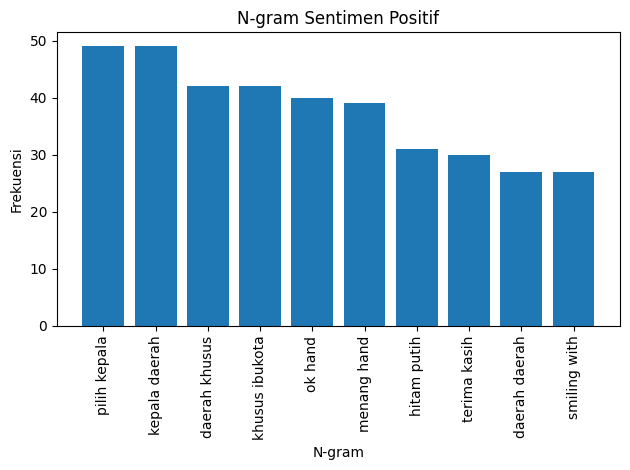

In [ ]:
import pandas as pd
from nltk.util import ngrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Membuat subset data sentimen negatif
df_negatif = df1[df1['Sentiment'] == 'negative']
# Menggabungkan semua teks dari kolom 'clean_text' pada sentimen negatif menjadi satu string
text_negatif = ' '.join(df_negatif['clean_text'].astype(str))

# Membuat subset data sentimen positif
df_positif = df1[df1['Sentiment'] == 'positive']
# Menggabungkan semua teks dari kolom 'clean_text' pada sentimen positif menjadi satu string
text_positif = ' '.join(df_positif['clean_text'].astype(str))

# Membuat n-gram untuk sentimen negatif
tokens_negatif = text_negatif.split()
n = 2  # Menentukan jumlah kata dalam n-gram
ngram_negatif = list(ngrams(tokens_negatif, n))

# Menghitung frekuensi n-gram sentimen negatif
freq_negatif = FreqDist(ngram_negatif)
most_common_negatif = freq_negatif.most_common(10)

# Membuat barplot untuk n-gram sentimen negatif
labels_negatif, counts_negatif = zip(*most_common_negatif)
labels_negatif = [' '.join(label) for label in labels_negatif]  # Menggabungkan tuple n-gram menjadi string
counts_negatif = list(counts_negatif)  # Mengonversi counts menjadi list
plt.bar(labels_negatif, counts_negatif)
plt.xlabel('N-gram')
plt.ylabel('Frekuensi')
plt.title('N-gram Sentimen Negatif')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

print()

# Membuat n-gram untuk sentimen positif
tokens_positif = text_positif.split()
ngram_positif = list(ngrams(tokens_positif, n))

# Menghitung frekuensi n-gram sentimen positif
freq_positif = FreqDist(ngram_positif)
most_common_positif = freq_positif.most_common(10)

# Membuat barplot untuk n-gram sentimen positif
labels_positif, counts_positif = zip(*most_common_positif)
labels_positif = [' '.join(label) for label in labels_positif]  # Menggabungkan tuple n-gram menjadi string
counts_positif = list(counts_positif)  # Mengonversi counts menjadi list
plt.bar(labels_positif, counts_positif)
plt.xlabel('N-gram')
plt.ylabel('Frekuensi')
plt.title('N-gram Sentimen Positif')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Barplot

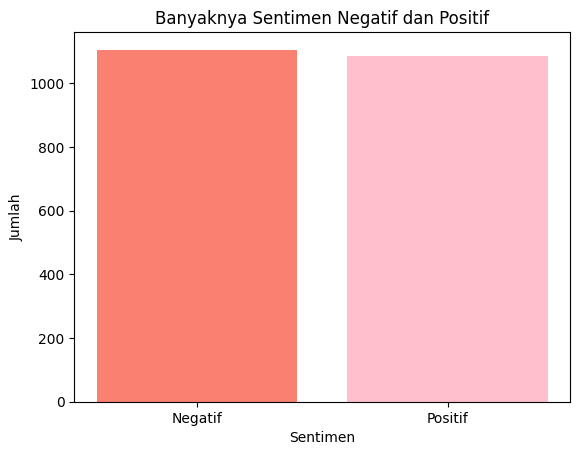

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen negatif dan positif
jumlah_negatif = df[df['Sentiment'] == 'negative'].shape[0]
jumlah_positif = df[df['Sentiment'] == 'positive'].shape[0]

# Menentukan warna untuk setiap bar
warna_negatif = 'salmon'
warna_positif = 'pink'
labels = ['Negatif', 'Positif']
jumlah = [jumlah_negatif, jumlah_positif]
warna = [warna_negatif, warna_positif]

plt.bar(labels, jumlah, color=warna)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Banyaknya Sentimen Negatif dan Positif')
plt.show()

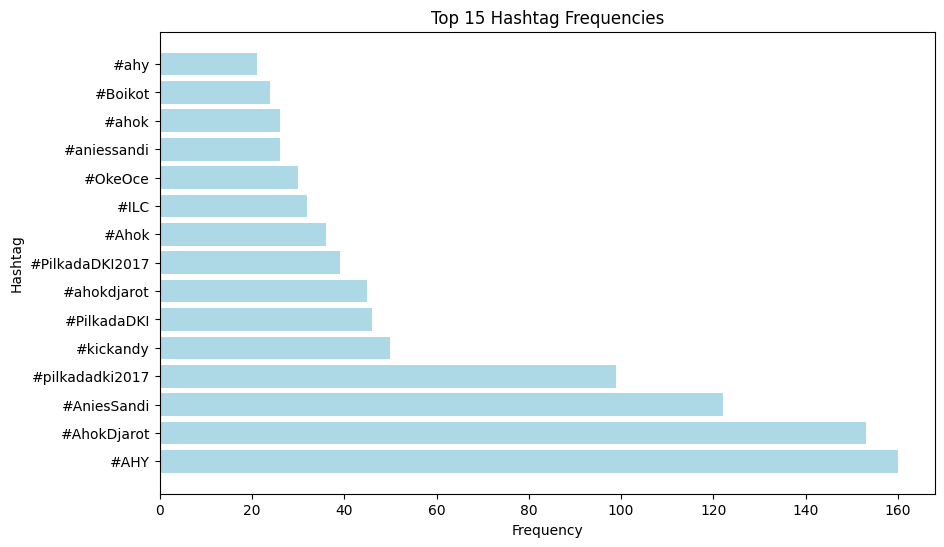

In [ ]:
n = 15  # Number of top frequent hashtags to be plotted
top_n_hashtags = hashtag_counts.head(n)

# bar chart hashtag
plt.figure(figsize=(10, 6))
plt.barh(top_n_hashtags.index, top_n_hashtags.values, color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.title(f'Top {n} Hashtag Frequencies')
plt.show()